# DataAnalysis

**steps:**
1. Data Collection and Preprocessing
2. Data Description
3. EDA Visualizations
4. EDA Summary
5. Text Preprocessing and Feature Extraction
6. Model Building 
7. Models Summary
8. Final Model selection 
9. Sentiment Prediction for each Medicine for the recommendation
10. Final Deployment

## Import basic libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from wordcloud import WordCloud
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from nltk.corpus import stopwords

import warnings
warnings.filterwarnings("ignore")

## Import dataset

In [2]:
drug_review_data = pd.read_csv("drugsCom_raw.tsv", sep='\t')
drug_review_data

Unnamed: 0                  drugName                     condition  \
0           206461                 Valsartan  Left Ventricular Dysfunction   
1            95260                Guanfacine                          ADHD   
2            92703                    Lybrel                 Birth Control   
3           138000                Ortho Evra                 Birth Control   
4            35696  Buprenorphine / naloxone             Opiate Dependence   
...            ...                       ...                           ...   
161292      191035                   Campral            Alcohol Dependence   
161293      127085            Metoclopramide               Nausea/Vomiting   
161294      187382                   Orencia          Rheumatoid Arthritis   
161295       47128        Thyroid desiccated           Underactive Thyroid   
161296      215220              Lubiprostone         Constipation, Chronic   

                                                   review  rating  \
0       "It has no side effect, I take it in combinati...     9.0   
1       "My son is halfway through his fourth week of ...     8.0   
2       "I used to take another oral contraceptive, wh...     5.0   
3       "This is my first time using any form of birth...     8.0   
4       "Suboxone has completely turned my life around...     9.0   
...                                                   ...     ...   
161292  "I wrote my first report in Mid-October of 201...    10.0   
161293  "I was given this in IV before surgey. I immed...     1.0   
161294  "Limited improvement after 4 months, developed...     2.0   
161295  "I&#039;ve been on thyroid medication 49 years...    10.0   
161296  "I&#039;ve had chronic constipation all my adu...     9.0   

                      date  usefulCount  
0             May 20, 2012           27  
1           April 27, 2010          192  
2        December 14, 2009           17  
3         November 3, 2015           10  
4        November 27, 2016           37  
...                    ...          ...  
161292        May 31, 2015          125  
161293    November 1, 2011           34  
161294      March 15, 2014           35  
161295  September 19, 2015           79  
161296   December 13, 2014          116  

[161297 rows x 7 columns]

### 2.1 Extracting data with specific conditions (Depression, High Blood Pressure, Diabetes, Type 2)

In [3]:
data_specific = drug_review_data[(drug_review_data['condition'] == 'Depression') |
                                 (drug_review_data['condition'] == 'High Blood Pressure') | 
                                 (drug_review_data['condition'] == 'Diabetes, Type 2')]
data_specific

Unnamed: 0        drugName            condition  \
11           75612  L-methylfolate           Depression   
31           96233      Sertraline           Depression   
44          121333     Venlafaxine           Depression   
50          156544     Dulaglutide     Diabetes, Type 2   
67          131909      Effexor XR           Depression   
...            ...             ...                  ...   
161251      198130      Metoprolol  High Blood Pressure   
161258       34443        Bystolic  High Blood Pressure   
161278       86533        Invokana     Diabetes, Type 2   
161286       93069    Vortioxetine           Depression   
161290      103458        Tekturna  High Blood Pressure   

                                                   review  rating  \
11      "I have taken anti-depressants for years, with...    10.0   
31      "1 week on Zoloft for anxiety and mood swings....     8.0   
44      "my gp started me on Venlafaxine yesterday to ...     4.0   
50      "Hey Guys,  It&#039;s been 4 months since my l...    10.0   
67      "This medicine saved my life. I was at my wits...    10.0   
...                                                   ...     ...   
161251  "It is fourth blood pressure pill for me. It f...     4.0   
161258  "While on Bystolic my feet and arms were numb....     1.0   
161278  "I just got diagnosed with type 2. My doctor p...     9.0   
161286  "This is the third med I&#039;ve tried for anx...     2.0   
161290  "I have only been on Tekturna for 9 days. The ...     7.0   

                    date  usefulCount  
11         March 9, 2017           54  
31           May 7, 2011            3  
44        April 27, 2016            3  
50      October 24, 2017           24  
67         June 20, 2013          166  
...                  ...          ...  
161251     July 15, 2009           39  
161258     July 18, 2009           25  
161278  October 23, 2015           47  
161286     July 17, 2016           33  
161290  February 7, 2010           18  

[13944 rows x 7 columns]

#### 2.2 Final dataframe by removing not useful columns i.e. Unnamed: 0 and date

In [4]:
columns = ['Unnamed: 0', 'date']
df = data_specific.drop(columns= columns).set_index(np.arange(0,len(data_specific)))
df

drugName            condition  \
0      L-methylfolate           Depression   
1          Sertraline           Depression   
2         Venlafaxine           Depression   
3         Dulaglutide     Diabetes, Type 2   
4          Effexor XR           Depression   
...               ...                  ...   
13939      Metoprolol  High Blood Pressure   
13940        Bystolic  High Blood Pressure   
13941        Invokana     Diabetes, Type 2   
13942    Vortioxetine           Depression   
13943        Tekturna  High Blood Pressure   

                                                  review  rating  usefulCount  
0      "I have taken anti-depressants for years, with...    10.0           54  
1      "1 week on Zoloft for anxiety and mood swings....     8.0            3  
2      "my gp started me on Venlafaxine yesterday to ...     4.0            3  
3      "Hey Guys,  It&#039;s been 4 months since my l...    10.0           24  
4      "This medicine saved my life. I was at my wits...    10.0          166  
...                                                  ...     ...          ...  
13939  "It is fourth blood pressure pill for me. It f...     4.0           39  
13940  "While on Bystolic my feet and arms were numb....     1.0           25  
13941  "I just got diagnosed with type 2. My doctor p...     9.0           47  
13942  "This is the third med I&#039;ve tried for anx...     2.0           33  
13943  "I have only been on Tekturna for 9 days. The ...     7.0           18  

[13944 rows x 5 columns]

## 3. EDA

### 3.1 Data Checking

In [5]:
print(df.isna().sum())

drugName       0
condition      0
review         0
rating         0
usefulCount    0
dtype: int64


In [6]:
print(df.isnull().sum())

drugName       0
condition      0
review         0
rating         0
usefulCount    0
dtype: int64


In [7]:
df.duplicated().sum()

0

### 3.2 Data Understanding

In [8]:
df.dtypes

drugName        object
condition       object
review          object
rating         float64
usefulCount      int64
dtype: object

In [9]:
# since rating is ordinal data type, we need to change it to 'int' from 'float'
df['rating'] = df['rating'].astype("int")

In [10]:
df.dtypes

drugName       object
condition      object
review         object
rating          int32
usefulCount     int64
dtype: object

In [11]:
df.describe(exclude='object')

rating   usefulCount
count  13944.000000  13944.000000
mean       6.862952     45.737880
std        3.207061     51.782627
min        1.000000      0.000000
25%        4.000000     16.000000
50%        8.000000     31.000000
75%       10.000000     59.000000
max       10.000000   1291.000000

#### 3.2.1 Feature wise analysis

##### 3.2.1.1 Analysis on drugName

In [12]:
# Total No.of Unique Medicines
df['drugName'].nunique()

334

In [13]:
# No.of times each medicine appeared in the dataset
dn = pd.merge(df['drugName'], 
         df.groupby(['drugName']).size().reset_index(name='drug_count'), 
         on = 'drugName', 
         how = 'left').drop_duplicates().reset_index().drop(columns='index')
dn

drugName  drug_count
0    L-methylfolate          66
1        Sertraline         459
2       Venlafaxine         437
3       Dulaglutide         231
4        Effexor XR         133
..              ...         ...
329        Uniretic           1
330       Minipress           1
331        Acarbose           1
332         Midamor           1
333         Aldomet           1

[334 rows x 2 columns]

In [14]:
# Drugs appeared more then 50 times in the dataset
dn[dn['drug_count']>=50].count()

drugName      60
drug_count    60
dtype: int64

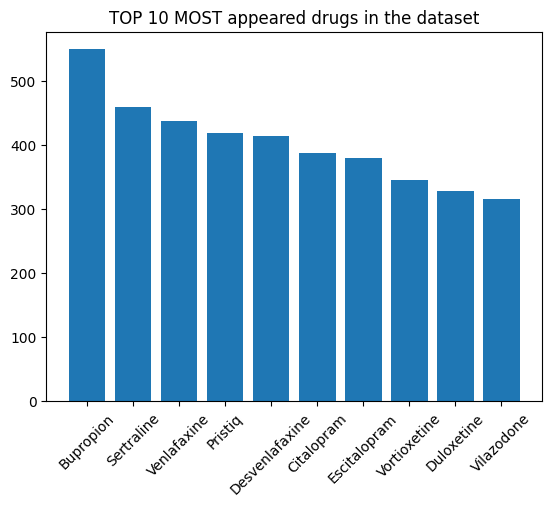

drugName  drug_count
10       Bupropion         549
1       Sertraline         459
2      Venlafaxine         437
18         Pristiq         418
8   Desvenlafaxine         414
41      Citalopram         388
23    Escitalopram         380
51    Vortioxetine         345
35      Duloxetine         328
44      Vilazodone         315

In [15]:
# TOP 10 MOST appeared drugs in the dataset

plt.bar(dn.sort_values(by= 'drug_count', ascending=False).head(10)['drugName'], 
        dn.sort_values(by= 'drug_count', ascending=False).head(10)['drug_count'])
plt.title("TOP 10 MOST appeared drugs in the dataset")
plt.xticks(rotation = 45)
plt.show()

dn.sort_values(by= 'drug_count', ascending=False).head(10)

In [16]:
#NO .of drugs appeared less then 10 times
dn[dn['drug_count']<=10].count()

drugName      183
drug_count    183
dtype: int64

In [17]:
# No.of drugs appeared only once
dn[dn['drug_count']==1].count()

drugName      62
drug_count    62
dtype: int64

condition
Depression             105
Diabetes, Type 2        89
High Blood Pressure    140
Name: drugName, dtype: int64


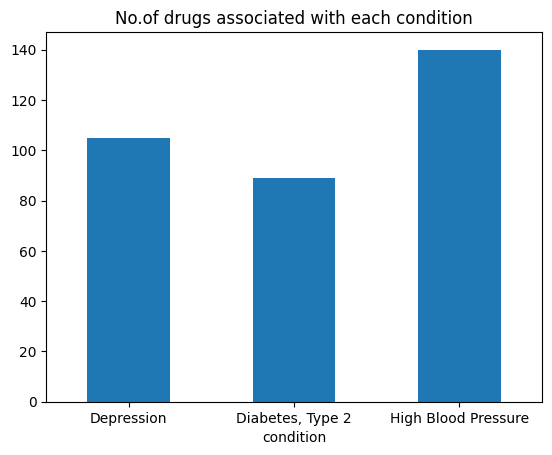

In [18]:
#  Drugs associated with each condition class

print(df.groupby(['condition'])['drugName'].nunique())

df.groupby(['condition'])['drugName'].nunique().plot(kind='bar')
plt.title("No.of drugs associated with each condition")
plt.xticks(rotation=0)
plt.show()

#### 3.2.1.2 Analysis of 'Condition' feature

Depression             9069
Diabetes, Type 2       2554
High Blood Pressure    2321
Name: condition, dtype: int64


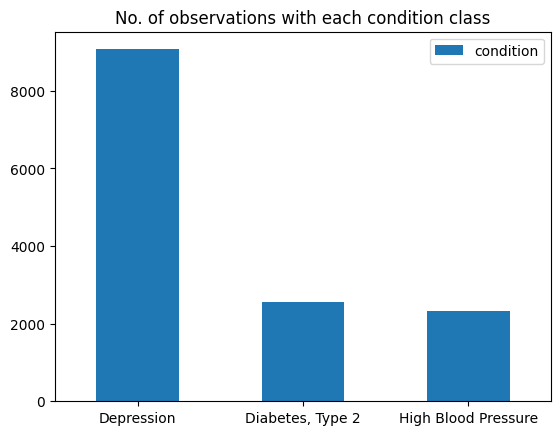

In [19]:
# No. of observations with each condition class
print(df['condition'].value_counts())

pd.DataFrame(df['condition'].value_counts()).plot(kind='bar')
plt.title("No. of observations with each condition class")
plt.xticks(rotation=0)
plt.show()

In [20]:
# DataFrame of Depression condition class
depression_df = df[df.condition == 'Depression'].drop(columns='condition').reset_index().drop(columns='index')
depression_df

drugName                                             review  \
0     L-methylfolate  "I have taken anti-depressants for years, with...   
1         Sertraline  "1 week on Zoloft for anxiety and mood swings....   
2        Venlafaxine  "my gp started me on Venlafaxine yesterday to ...   
3         Effexor XR  "This medicine saved my life. I was at my wits...   
4         Wellbutrin  "Started taking it and I slept well at night a...   
...              ...                                                ...   
9064          Zoloft  "After a little over two months taking 50mg of...   
9065         Rexulti  "in my third week of 05 mg as add on to Paxil,...   
9066        Seroquel  "I have been on Seroquel for several years and...   
9067      Sertraline  "I have been taking Wellbutrin for a while for...   
9068    Vortioxetine  "This is the third med I&#039;ve tried for anx...   

      rating  usefulCount  
0         10           54  
1          8            3  
2          4            3  
3         10          166  
4          4           15  
...      ...          ...  
9064       8           80  
9065       8           41  
9066      10           36  
9067       3            6  
9068       2           33  

[9069 rows x 4 columns]

In [21]:
# Define a function to plot word cloud
def plot_cloud(wordcloud, title=None, title_size=None):
    # Set figure size
    plt.figure(figsize=(40, 30))
    #title
    plt.title(title,fontdict={'size': title_size})
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off"); 
    

In [22]:
# stopwords from sklearn
sklearn_stopwords = set(ENGLISH_STOP_WORDS)

# stopwords from nltk
nltk_stopwords = set(stopwords.words('english'))

# combined stopwords
combined_stopwords = nltk_stopwords.union(sklearn_stopwords)
print(combined_stopwords)

{'four', 'into', 'serious', 'thus', 'now', 'done', 'o', 'they', 'it', 'few', 'whom', 'another', 'not', 'himself', 'so', 'without', 'on', 'be', 'of', 'shouldn', 'should', 'could', 'won', 'wherever', 'please', 'you', "don't", 'everyone', 'when', 'don', 'ten', 'within', 'or', 'haven', 'throughout', 'no', "weren't", 'namely', 'myself', 'more', 'whence', 'themselves', 'alone', 'over', 'yourselves', 'in', 'perhaps', 'although', 'five', 'therein', 'ltd', 'theirs', 'indeed', 'nor', 'm', 'further', 'nobody', 'needn', 'those', 't', 'between', 'sometimes', 'may', "should've", 'wherein', 'sincere', 'how', 'her', "mustn't", 'towards', 'whereas', 'whether', 'whatever', 'take', 'aren', "isn't", 'been', 'do', 'does', 'back', 'for', 'mostly', 'isn', "won't", 'less', 'have', 'most', 'move', 'across', 'eg', 'thereupon', 'nevertheless', 'hasnt', 'along', 'de', 'my', 'then', 'shan', 'doesn', 'none', 'i', 'via', 'your', 'forty', 'thick', 'did', 'after', 'per', 'hereafter', 'twelve', 'me', 'fill', 'down', 's

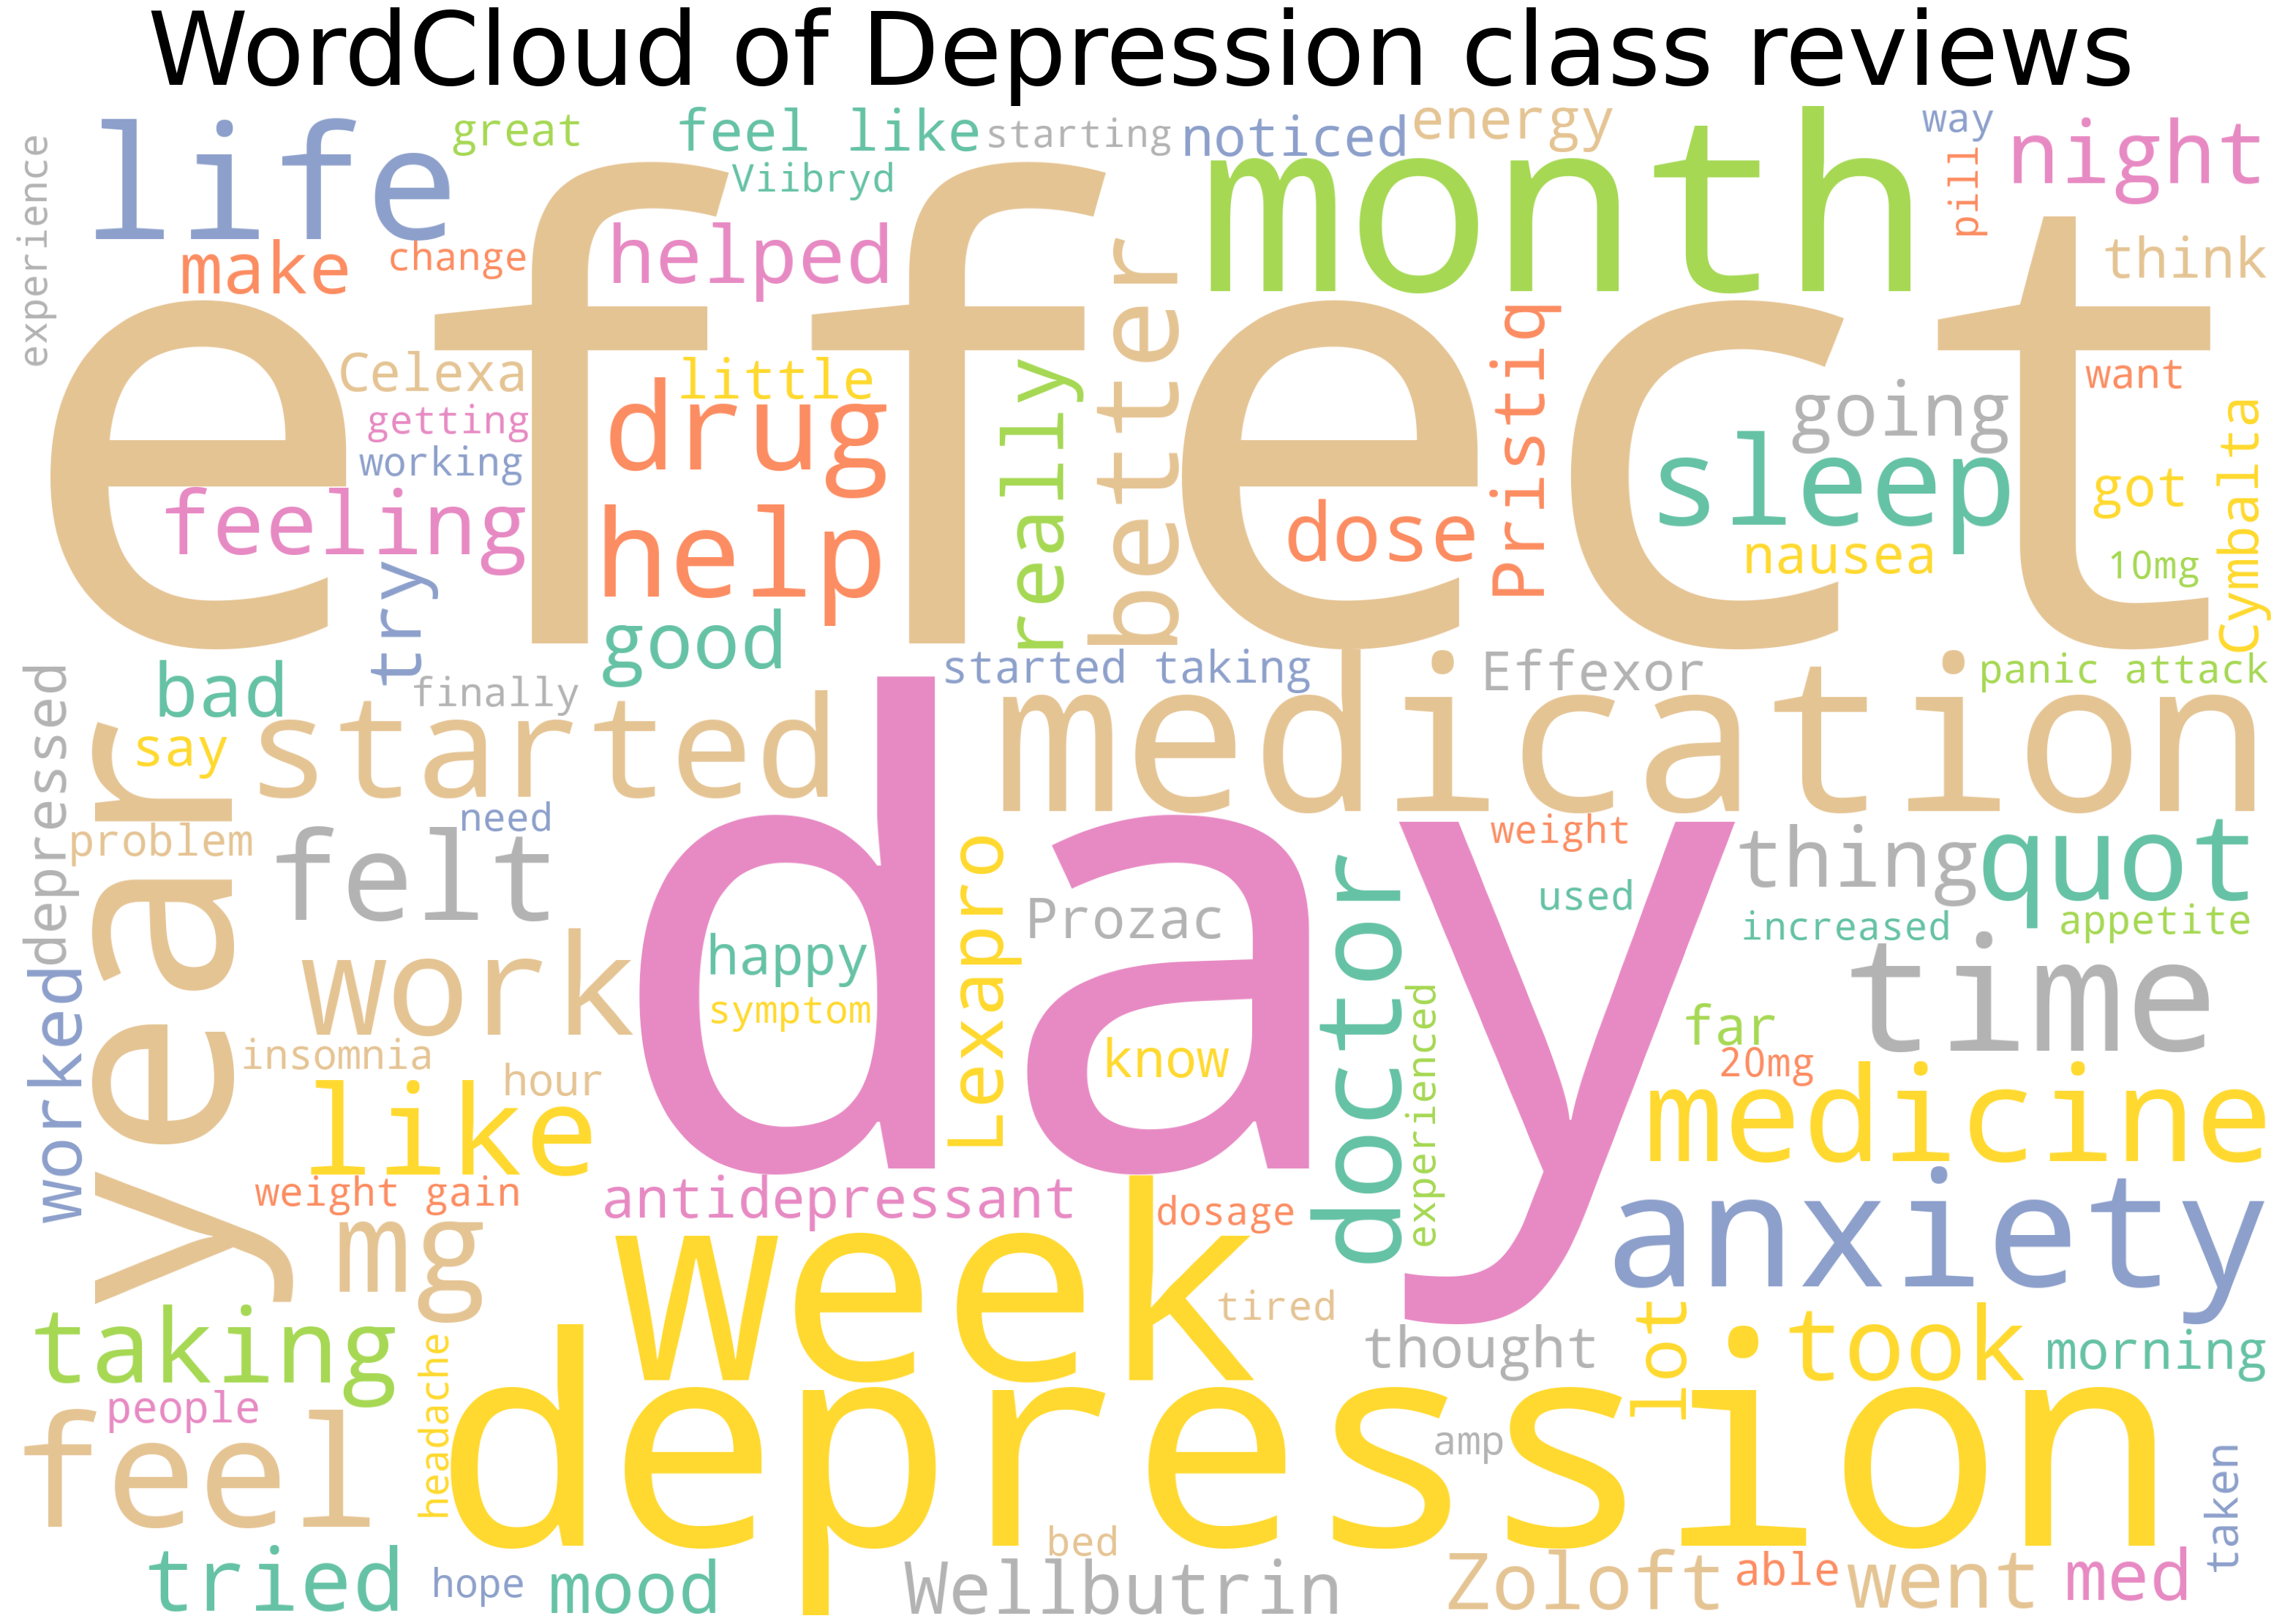

In [23]:
# WordCloud of Depression class reviews
wordcloud_depression = WordCloud(width = 3000, 
                      height = 2000, 
                      background_color='white', 
                      max_words=100, 
                      colormap='Set2',
                      stopwords=combined_stopwords).generate(" ".join(depression_df['review']))

plot_cloud(wordcloud_depression, 
           title = 'WordCloud of Depression class reviews', 
           title_size=100)

In [24]:
# DataFrame of Diabetes condition class
diabetes_df = df[df.condition == 'Diabetes, Type 2'].drop(columns='condition').reset_index().drop(columns='index')
diabetes_df

drugName                                             review  \
0       Dulaglutide  "Hey Guys,  It&#039;s been 4 months since my l...   
1       Dulaglutide  "I was recently referred to a endocrinologist ...   
2       Liraglutide  "have only been on victorza for a few days.  I...   
3     Empagliflozin  "I have been taking Jardiance for just over a ...   
4           Victoza  "I&#039;ve been on Victoza for 13 days and hav...   
...             ...                                                ...   
2549    Liraglutide  "I have been on Victoza for 4 weeks now.  I st...   
2550      Trulicity  "I have been on this medication for the last m...   
2551        Victoza  "Started off 6-7 months ago with low dose then...   
2552    Liraglutide  "I took Victoza for a few months and it caused...   
2553       Invokana  "I just got diagnosed with type 2. My doctor p...   

      rating  usefulCount  
0         10           24  
1          9           12  
2          5           18  
3         10           47  
4         10            6  
...      ...          ...  
2549       9           38  
2550       9           27  
2551       5            3  
2552       1            9  
2553       9           47  

[2554 rows x 4 columns]

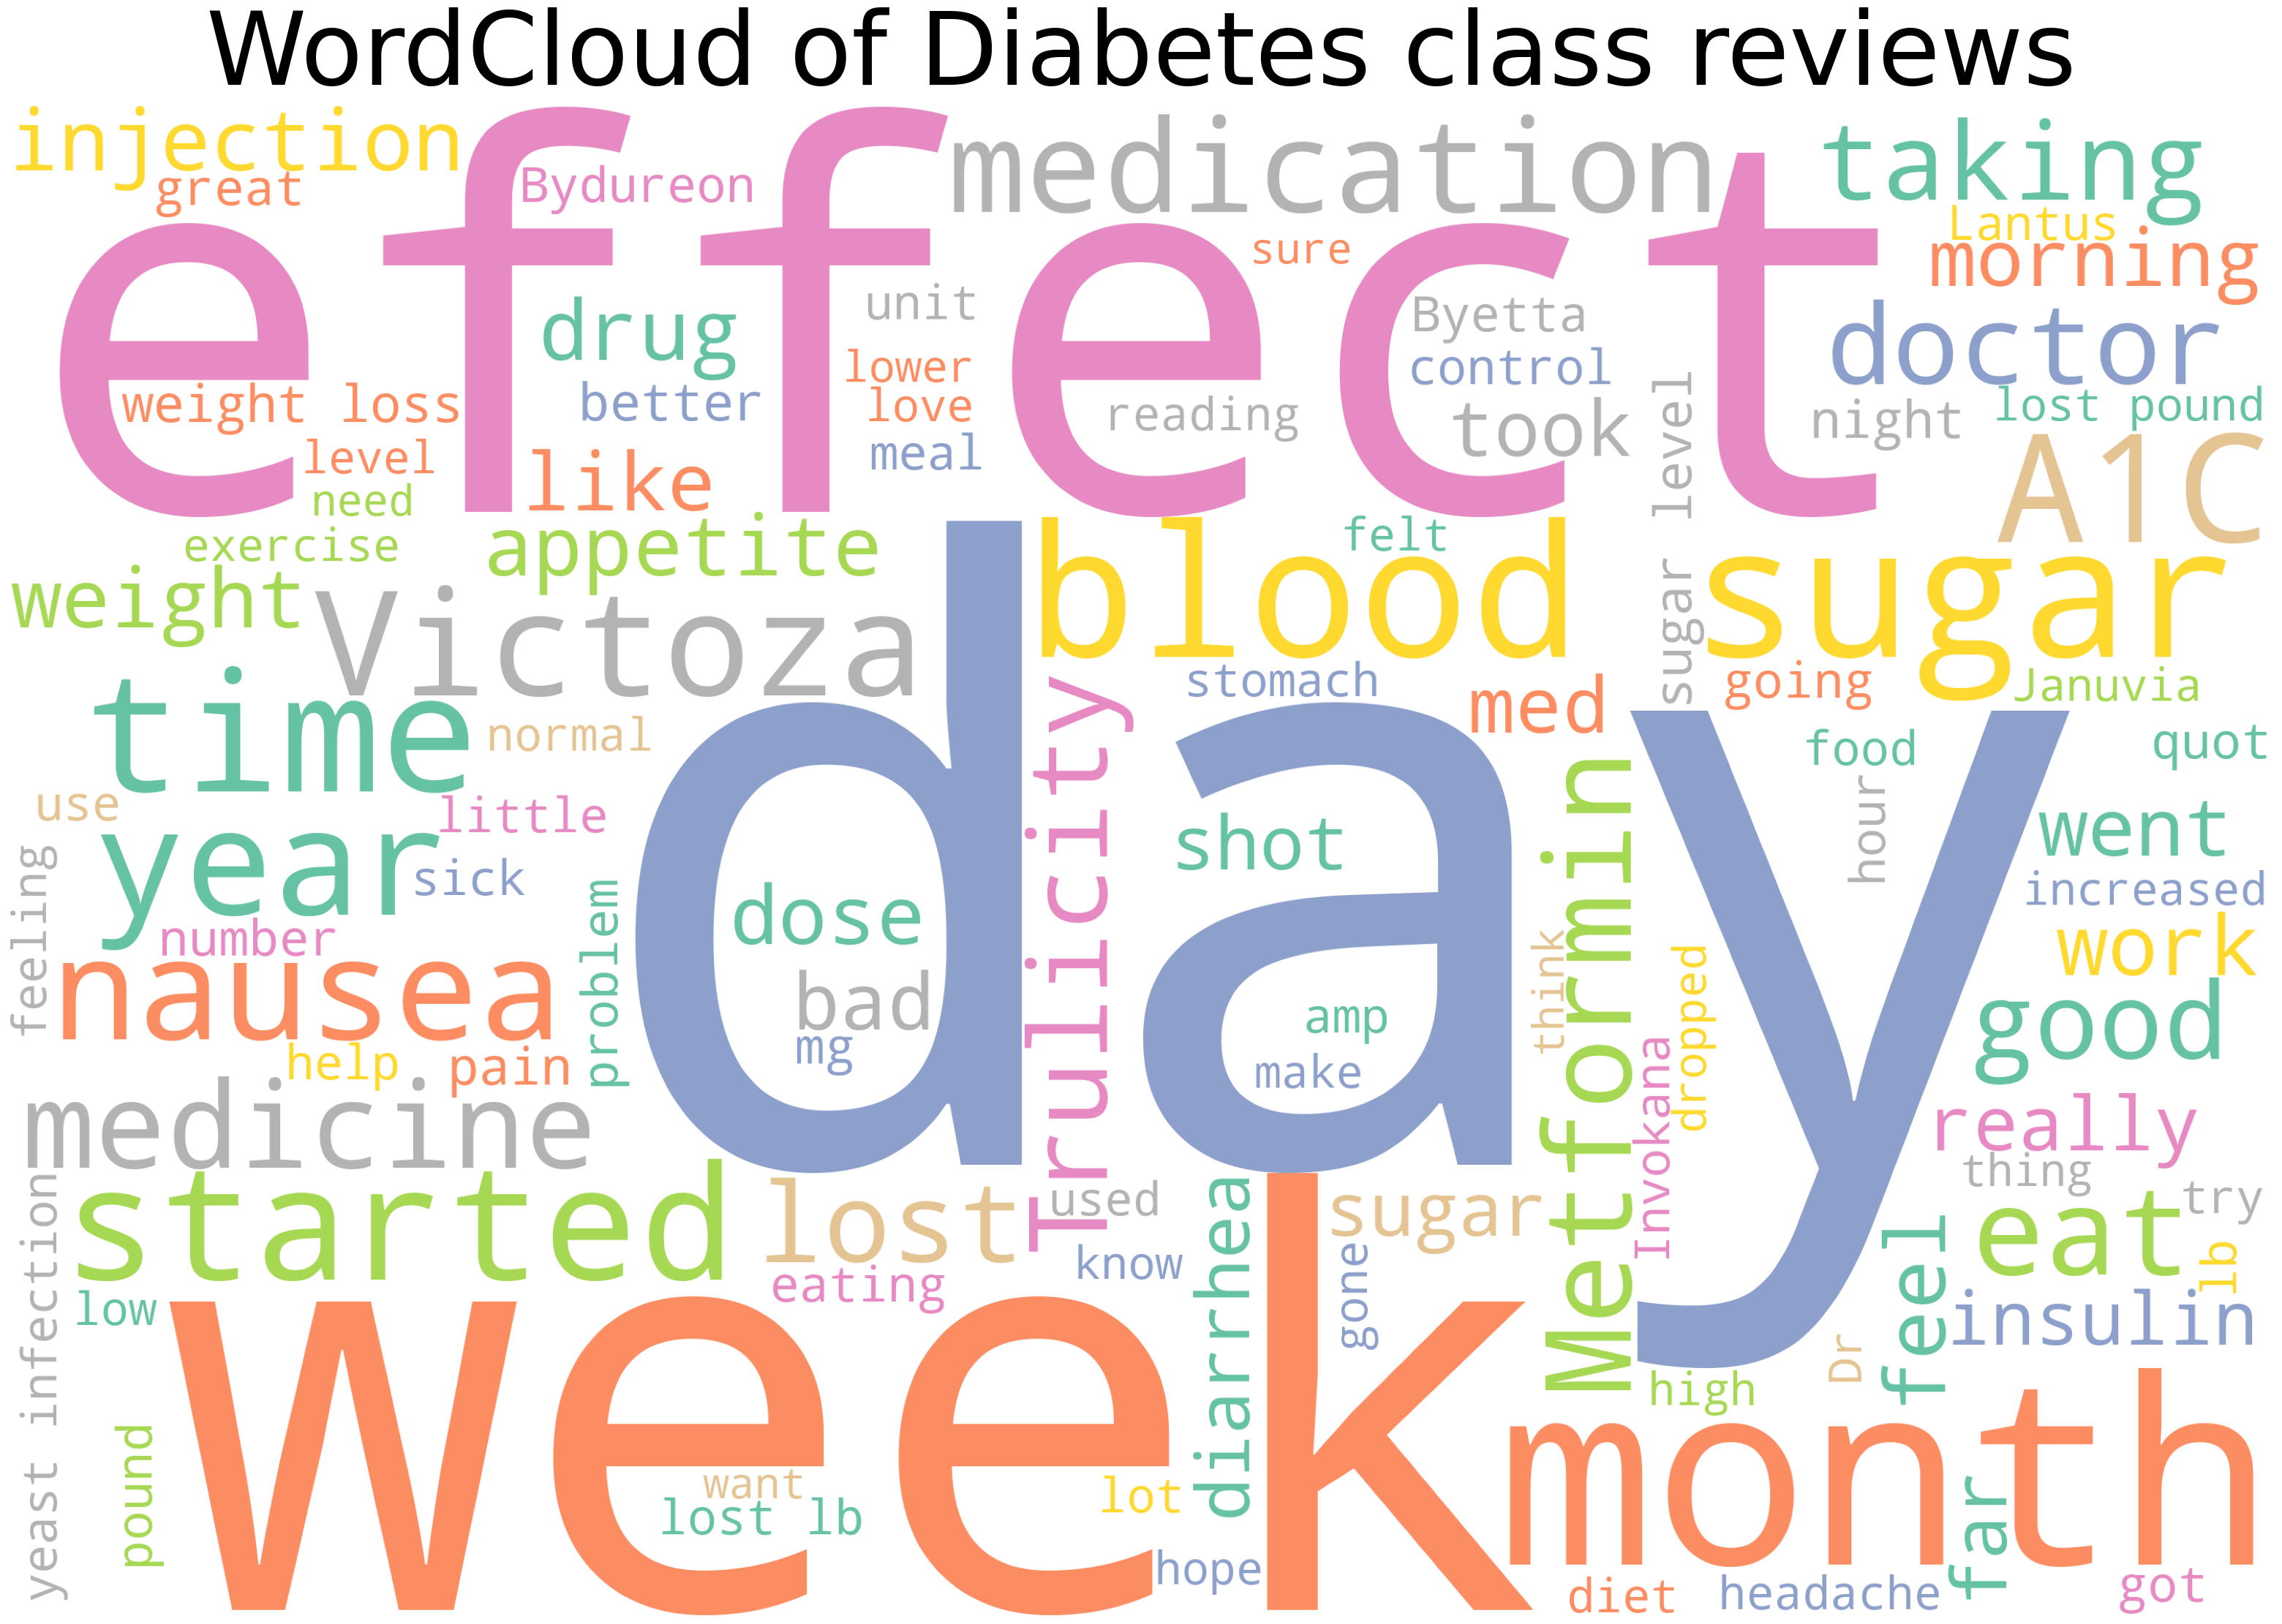

In [25]:
# WordCloud of Diabetes class reviews
wordcloud_diabetes = WordCloud(width = 3000, 
                      height = 2000, 
                      background_color='white', 
                      max_words=100, 
                      colormap='Set2',
                      stopwords=combined_stopwords).generate(" ".join(diabetes_df['review']))

plot_cloud(wordcloud_diabetes, 
           title = 'WordCloud of Diabetes class reviews', 
           title_size=100)

In [26]:
# DataFrame of High BP condition class
hibp_df = df[df.condition == 'High Blood Pressure'].drop(columns='condition').reset_index().drop(columns='index')
hibp_df

drugName  \
0     Amlodipine / olmesartan   
1                  Lisinopril   
2                  Metoprolol   
3                    Prazosin   
4                  Metoprolol   
...                       ...   
2316                 Bystolic   
2317                 Losartan   
2318               Metoprolol   
2319                 Bystolic   
2320                 Tekturna   

                                                 review  rating  usefulCount  
0     "My blood pressure has been around 160/100. Do...      10           10  
1     "I&#039;m a 27 year old white male in good sha...      10           55  
2     "I have been on metoprolol er 12.5mg since Sep...       2           19  
3     "Using this for parasomnia, bph and bp. Kind o...       6            2  
4     "I took Lopressor for 24 years it worked very ...      10           55  
...                                                 ...     ...          ...  
2316  "I&#039;m a 54 years old non-smoker, 5&#039;8&...      10           76  
2317  "I took this along with a beta blocker,and alt...       2          105  
2318  "It is fourth blood pressure pill for me. It f...       4           39  
2319  "While on Bystolic my feet and arms were numb....       1           25  
2320  "I have only been on Tekturna for 9 days. The ...       7           18  

[2321 rows x 4 columns]

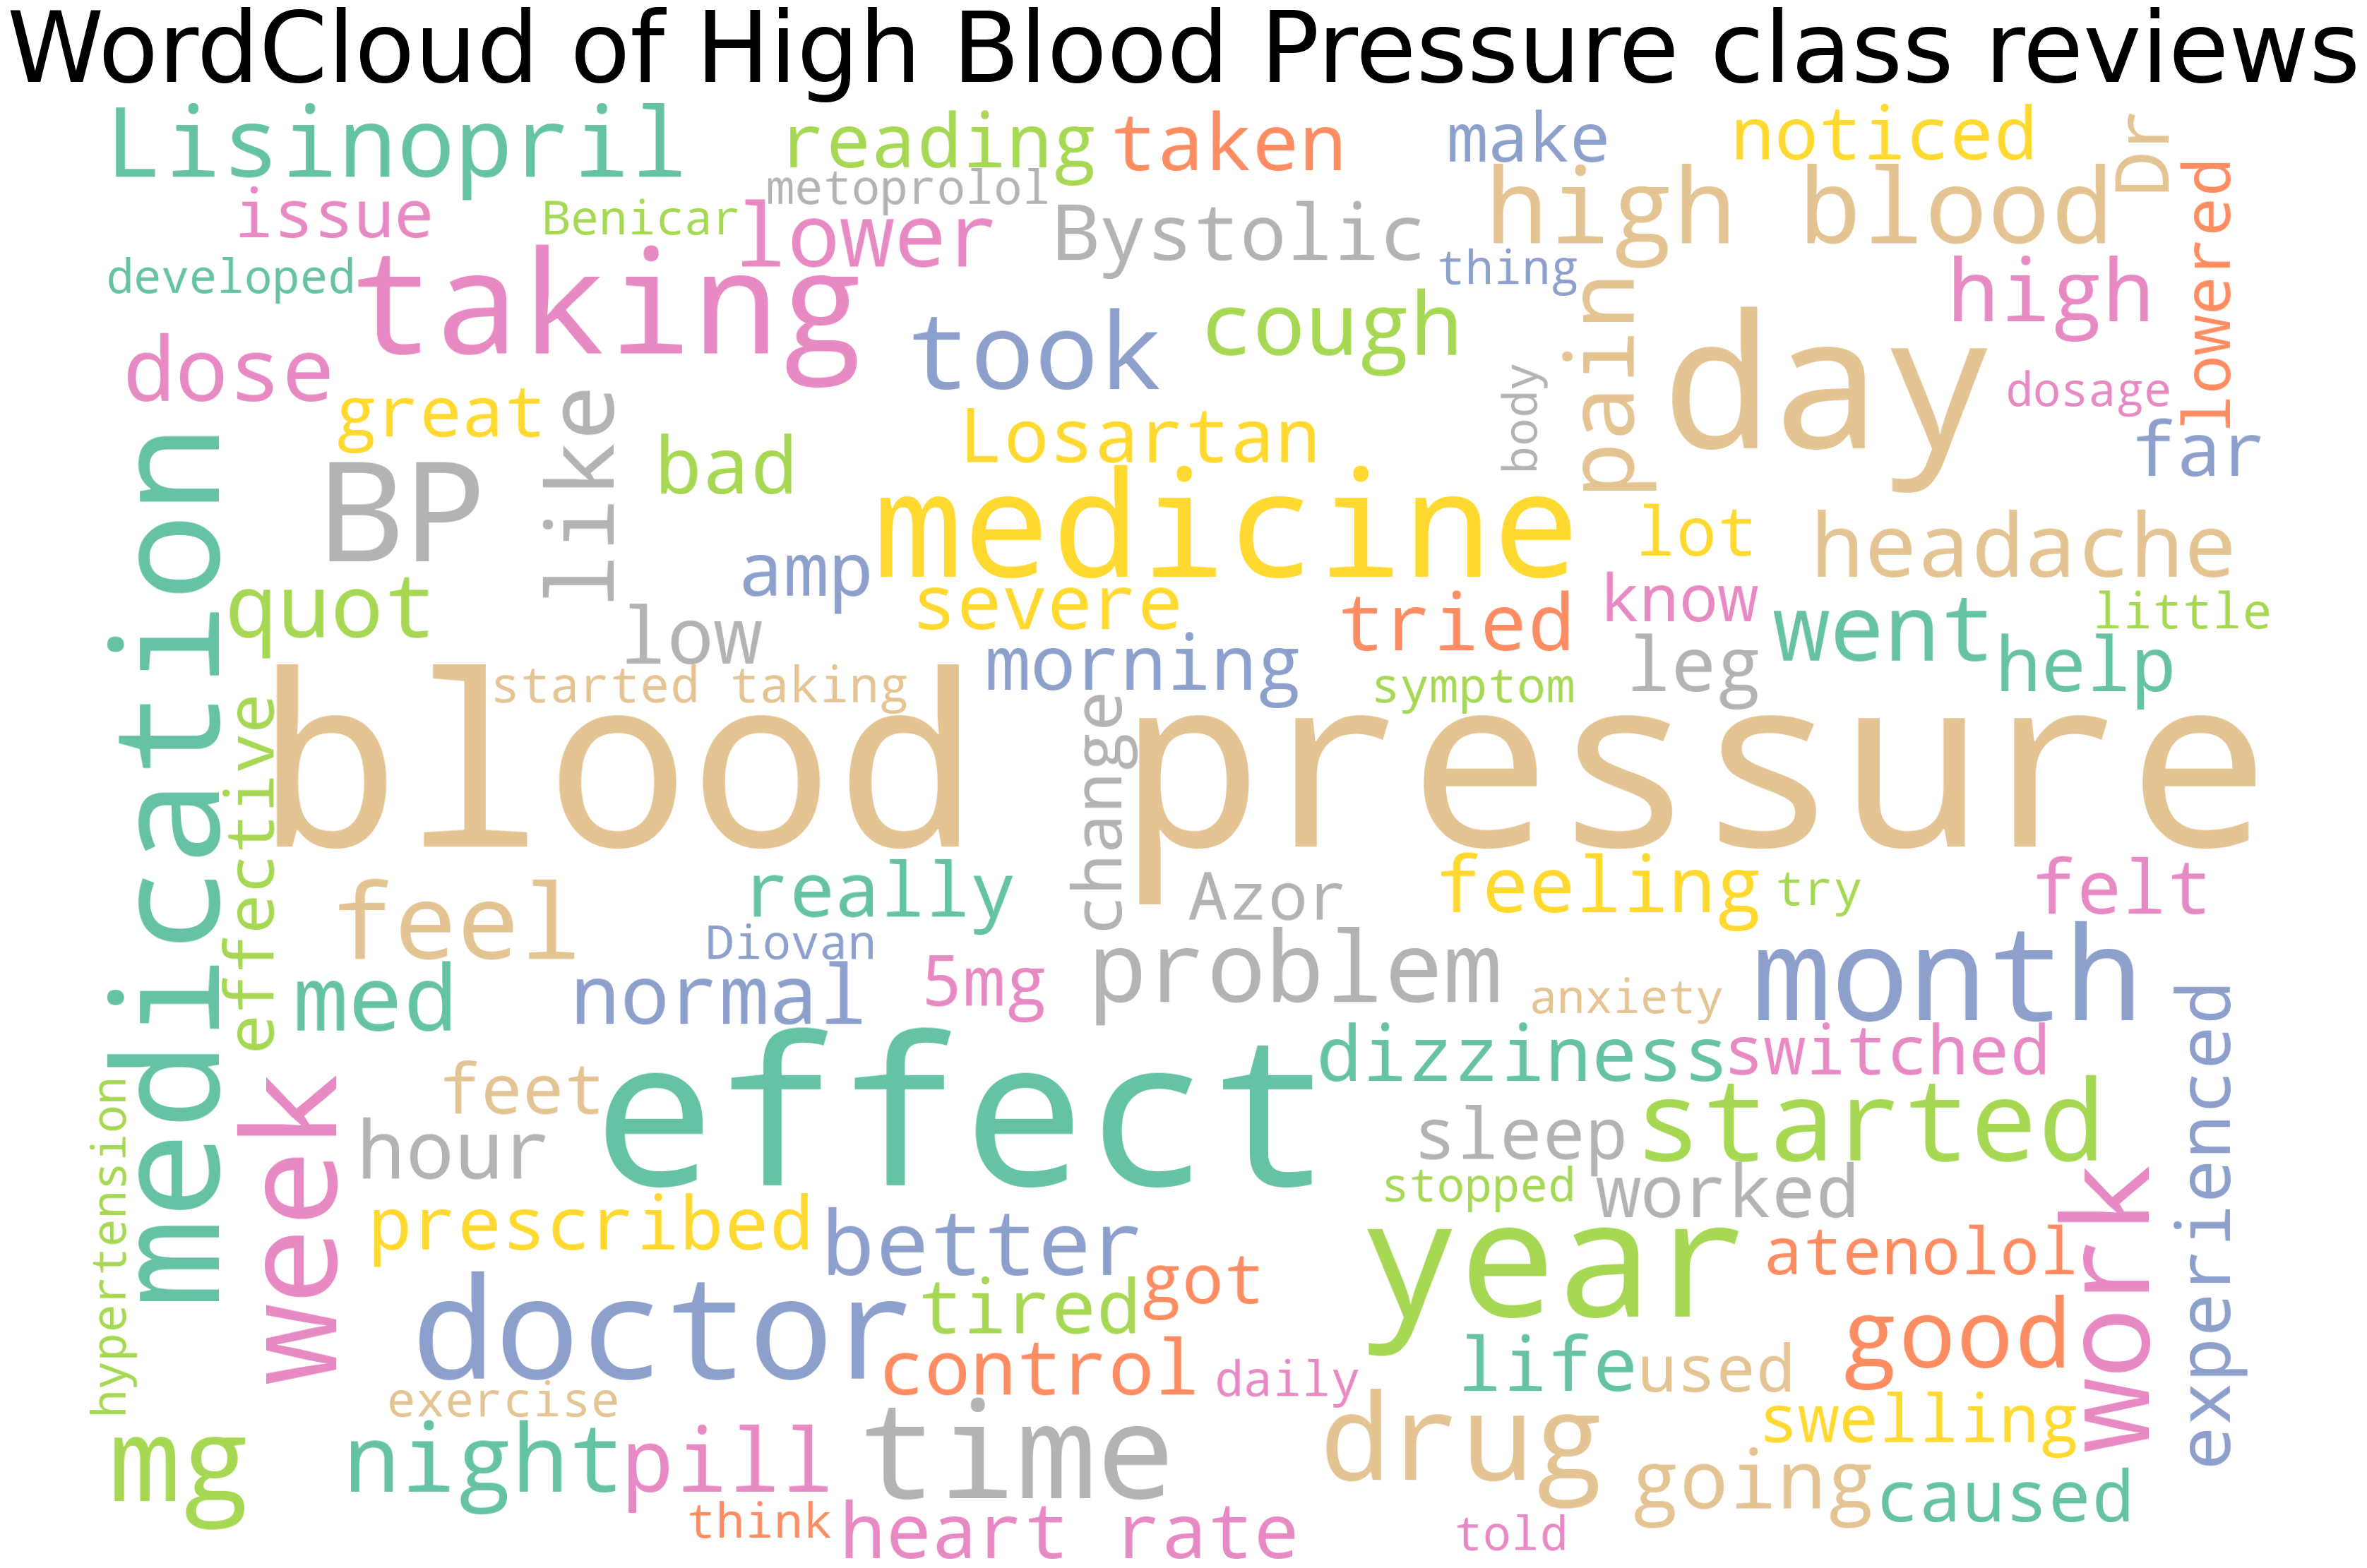

In [27]:
# WordCloud of High BP class reviews
wordcloud_hibp = WordCloud(width = 3000, 
                      height = 2000, 
                      background_color='white', 
                      max_words=100, 
                      colormap='Set2',
                      stopwords=combined_stopwords).generate(" ".join(hibp_df['review']))

plot_cloud(wordcloud_hibp, 
           title = 'WordCloud of High Blood Pressure class reviews', 
           title_size=100)

#### 3.2.1.3 Analysis of 'rating' feature

In [45]:
df.rating.value_counts()

10    3763
9     2468
1     1802
8     1795
7      995
5      756
6      680
2      645
3      582
4      458
Name: rating, dtype: int64

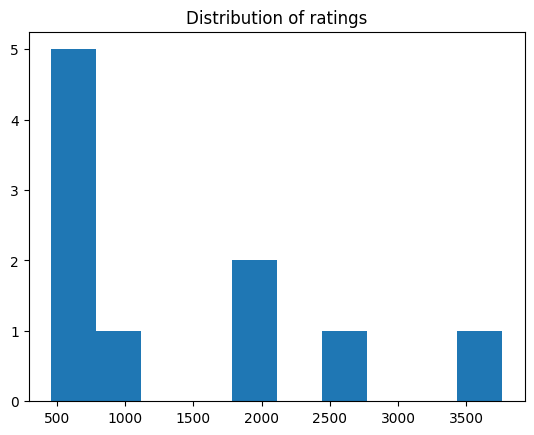

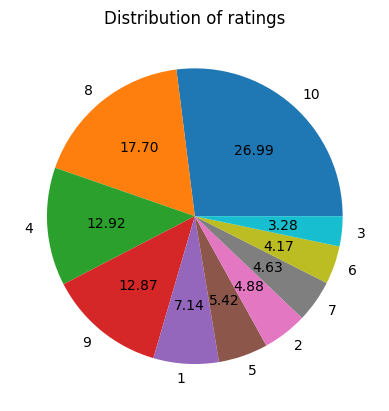

In [44]:
# Distribution of ratings
plt.hist(df.rating.value_counts())
plt.title("Distribution of ratings")
plt.show()

plt.pie(df.rating.value_counts(), 
        labels=df['rating'].unique(), 
        autopct= '%0.2f')
plt.title("Distribution of ratings")
plt.show()

In [6]:
df.loc[(df['rating'] > 5), 'review_Sentiment'] = 1
df.loc[(df['rating'] <= 5), 'review_Sentiment'] = 0

df['review_Sentiment'].value_counts()

1.0    9701
0.0    4243
Name: review_Sentiment, dtype: int64

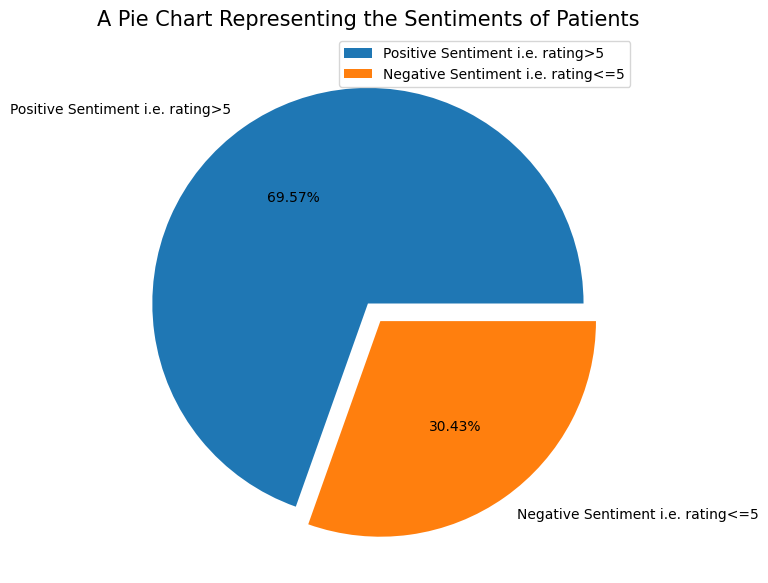

In [11]:
# pie chart for the positive and negetive sentiments
plt.rcParams['figure.figsize'] = (7,7)
plt.pie(df['review_Sentiment'].value_counts(),
        labels = ["Positive Sentiment i.e. rating>5","Negative Sentiment i.e. rating<=5"], 
        explode = [0, 0.1], autopct = '%.2f%%')
plt.axis('off')
plt.title('A Pie Chart Representing the Sentiments of Patients', fontsize = 15)
plt.legend()
plt.show()

#### 3.2.1.4 Analysis of 'usefulCount' feature

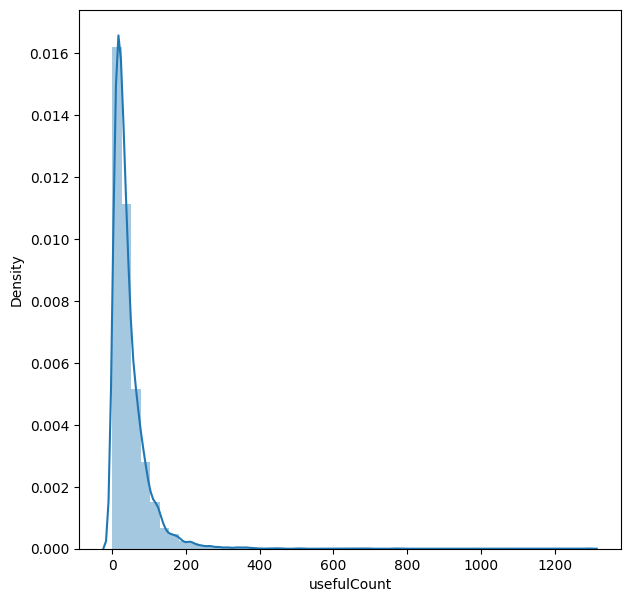

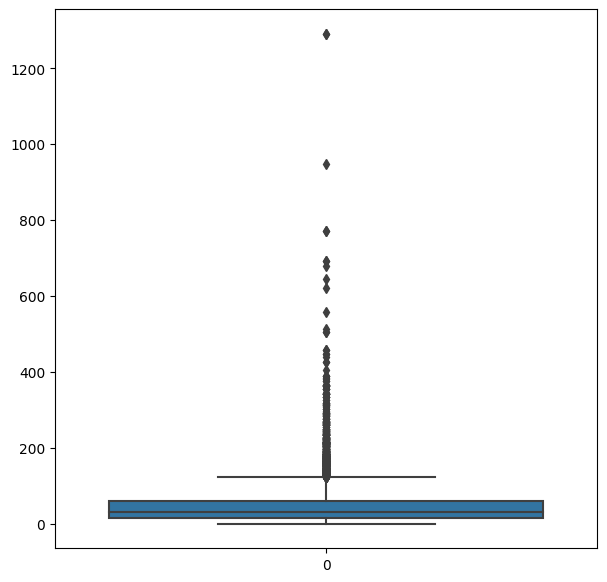

In [13]:
sns.distplot(df.usefulCount)
plt.show()
sns.boxplot(df.usefulCount)
plt.show()

### 3. EDA SUMMARY
#### Data Checking
1. There are NO Null values.
2. There are No Nan Values.
3. There are NO duplicate observations.

#### Data Understanding
1. There are different types of data present in the dataset i.e. Drug Name is Nominal, Condition(Which is our target variable) is Categorical, Review is Text, Rating is Ordinal Numerical(1-10) and usefulCount is Discrete Numerical.
2. DrugName feature has 334 unique drugs, only 60 drugs appeared more then 50 times in the dataset, 183 drugs appeared less then 10 times and 62 drugs appeared only once.
3. UsefulCount has values ranging from 0 to 1291 and the Median value is at 31. This means the data is highly left skewed. From the distribution plot, very few observations got more then 200 usefulCount.
4. If we take rating>5 as positive sentiment and rating<=5 as negitive sentiment then the distribution of sentiments shows 70% positive and 30% negetive sentiment.
